# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the alias `pd`.

In [359]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [360]:
pd.__version__

'1.0.3'

**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [361]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.3
numpy            : 1.17.4
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.4.0.post20200518
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.5.0
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.13.0
pandas_datareader: None
bs4              : None
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.5.0
matpl

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [362]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)# (complete this line of code)

**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [363]:
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


(None,
             age     visits
 count  8.000000  10.000000
 mean   3.437500   1.900000
 std    2.007797   0.875595
 min    0.500000   1.000000
 25%    2.375000   1.000000
 50%    3.000000   2.000000
 75%    4.625000   2.750000
 max    7.000000   3.000000)

**6.** Return the first 3 rows of the DataFrame `df`.

In [364]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [365]:
df.loc[:,'animal']
# loc 是中括弧，前行后列，可以传入列表

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object

**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [366]:
display(df.loc['b':'e','animal'])
# 因为设置了 index ，所以前面的筛选要给设定的 labels
display(df.loc[['b','e'],['animal','age']])
# 当然也可以传入 list
display(df.loc[df.index[[3, 4, 8]], ['animal', 'age']])
# 如果还要按照排序，则使用 df.index ,注意 df.index 只接受数字
## 对于多列多行显示，display会有优化
display(df.iloc[[3, 4, 8], [1, 2]])
## 当然也可以直接使用 iloc
## loc 和 iloc 如果只传入一个参数，前者是所有行和选定列，后者是所有列和选定行

b      cat
c    snake
d      dog
e      dog
Name: animal, dtype: object

,animal,age
b,cat,3.0
e,dog,5.0


,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


,age,visits
d,NaN,3
e,5.0,2
i,7.0,2


**9.** Select only the rows where the number of visits is greater than 3.

In [367]:
# df[df['visits']>=2]
# 推荐使用 fillter 和 loc 实现 注释掉的 chainmethord 在新版本中有兼容风险
display(df.loc[df['visits']>1])
display(df.loc[df.visits>2])
## 上面是对列的筛选，对row的筛选可以研究下 iloc
display(df.loc[lambda df: df.index == 'a'])
## lambda 也可以，不过推荐filter 可以串接

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
i,dog,7.0,2,no


,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


,animal,age,visits,priority
a,cat,2.5,1,yes


In [368]:
# filter 
display(df.filter(like='ge').filter(like='f',axis=0))
## 默认 filter 是对 column，加了 axis=0 是对列
## filter item 是 listlike 指定列，like 是包括关键字，regx 是正则表达式
display(df.filter(items=['a','d'],axis=0).filter(like='a'))
display(df.filter(items=['a','d'],axis=0).filter(like='a').filter('age==2.5'))
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html

,age
f,2.0


,animal,age
a,cat,2.5
d,dog,NaN


""
a
d


In [369]:
# query
display(df.query('visits > 2').query('age == 3.0'))
display(df.query('(visits > 2) and (age == 3.0)'))
## 多个筛选的例子 sales_data.query('(sales > 50000) and (region in ["East", "West"])') 上两个代码作用相同
## query 的 kwargs 与 eval 同，应该是使用 eval 进行判断之后筛选
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html
display(df.query('index < "c"')) # 如果默认是数字就是 < 3
## index 对应的是序列号，即使是指定过的字幕形式，也可以进行大小比较
## 目前 index 无法处理 listlike 的输入，需要结合 iloc 进行
display(df.iloc[[2,3]].query('visits > 1'))

,animal,age,visits,priority
b,cat,3.0,3,yes


,animal,age,visits,priority
b,cat,3.0,3,yes


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes


,animal,age,visits,priority
c,snake,0.5,2,no
d,dog,NaN,3,yes


**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [370]:
df.loc[df.age.isnull()]
## isnull 输出的是 booline 的序列，根据序列进行筛选
## df['age']  df.age   df.loc[:,'age'] 是等价的，工业化推荐使用最后的方式兼容性更好

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [371]:
# query solution
display(df.query('(animal=="cat") and (age==3)'))
# loc solution
display(df.loc[(df.animal=="cat") & (df.age==3)])
## loc 只能用 & 表示和，qeury 都可用。按位与逻辑的区别


,animal,age,visits,priority
b,cat,3.0,3,yes


,animal,age,visits,priority
b,cat,3.0,3,yes


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [372]:
display(df.query('age.between(2,3)'))
## query 更加简洁

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [373]:
## loc 和 query 还可以使用 isin
display(df.query('age.isin([2])'))

option = ['cat']
df.loc[df.animal.isin(["cat"])]

,animal,age,visits,priority
f,cat,2.0,3,no


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
h,cat,NaN,1,yes


**13.** Change the age in row 'f' to 1.5.

In [374]:
df.loc['f','age'] = 1.5

**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [375]:
df.visits.sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [376]:
df.groupby('animal').age.mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [377]:
# df.loc 方式创建直是 index = value的方式
df.loc['k'] = ['dog',5.5,'no',2]
df.loc['kk'] = ['dog',5.5,'no',2]
df.tail(3)

,animal,age,visits,priority
j,dog,3.0,1,no
k,dog,5.5,no,2
kk,dog,5.5,no,2


In [378]:
df.drop(['k','kk'])

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**17.** Count the number of each type of animal in `df`.

In [379]:
df.animal.value_counts()

dog      6
cat      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [380]:
display(df.sort_values(by=['age', 'visits'], ascending=[False, True],inplace=True))
## 注意如果不加 inplace 不会改变数据存储顺序
df

None

,animal,age,visits,priority
i,dog,7.0,2,no
k,dog,5.5,no,2
kk,dog,5.5,no,2
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [381]:
df.priority = df.priority.map({'yes': True, 'no': False})
df

,animal,age,visits,priority
i,dog,7.0,2,False
k,dog,5.5,no,NaN
kk,dog,5.5,no,NaN
e,dog,5.0,2,False
g,snake,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,1.5,3,False
c,snake,0.5,2,False


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [382]:
df.animal.replace('snake','python',inplace=True)
df

,animal,age,visits,priority
i,dog,7.0,2,False
k,dog,5.5,no,NaN
kk,dog,5.5,no,NaN
e,dog,5.0,2,False
g,python,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,1.5,3,False
c,python,0.5,2,False


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

### Pandas 筛选总结
- 过滤出新的 df 用 filter
- 过滤列用 query 更强大
- 过滤行用 loc，iloc 更强大
- 优先使用 query, query 和 df[ ] 等价, 但效率会高一些
- loc 中除了判断外可以使用 pandas 自带的 methord （e.g,isnull）
- 多条件过滤用 loc

### query
https://www.sharpsightlabs.com/blog/pandas-query/
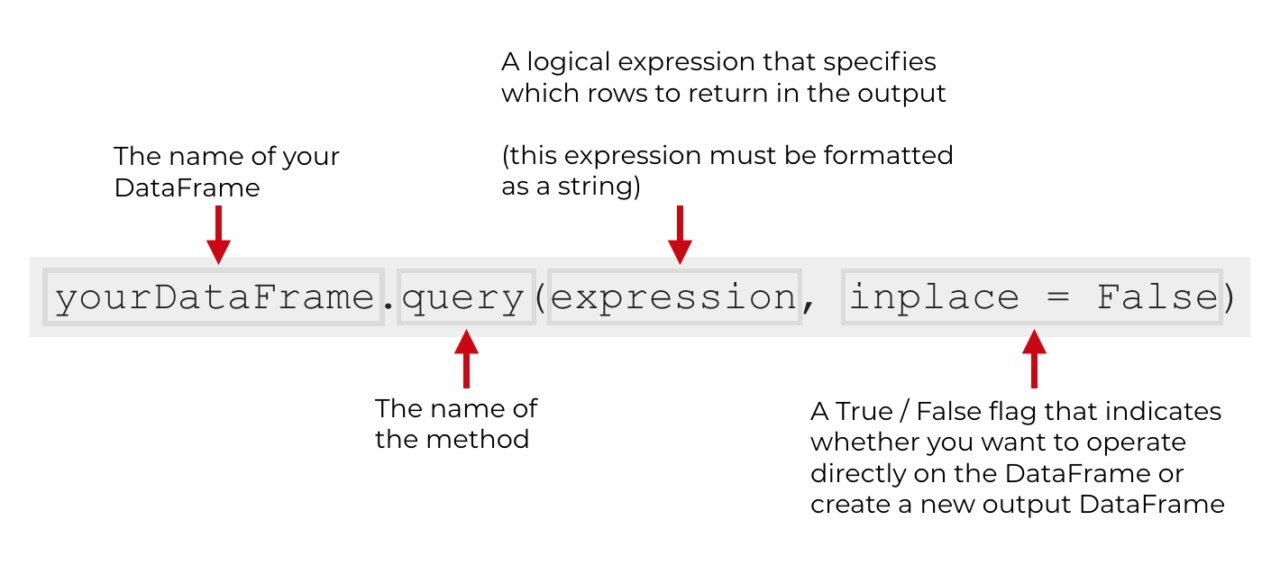

In [383]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3,no
animal,,,,
cat,2.5,NaN,2.25,NaN
dog,3.0,6.0,NaN,5.5
python,4.5,0.5,NaN,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [384]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7,1,1]})

df.loc[df.A.shift() != df.A]
# Alternatively, we could use drop_duplicates() here. Note
# that this removes *all* duplicates though, so it won't
# work as desired if A is [1, 1, 2, 2, 1, 1] for example.
## shift 是对数据做移动，上面代码比较的是移动后是否相同，不相同则记录。实际情况解决重复用 drop_duplicates

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7
11,1


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [385]:
df = pd.DataFrame(np.random.random(size=(5, 3)))

df.sub(df.mean(axis=1), axis=0)
## fill_value 可以指定 sub 之前如何填充
## rsub 是B-A，相当于求 sub 的负。另外还有 add mul div mod（余数） pow 等很方便

,0,1,2
0,0.183146,-0.026923,-0.156222
1,0.267381,-0.241747,-0.025634
2,0.030576,-0.283271,0.252695
3,0.331587,-0.113477,-0.218110
4,-0.018151,-0.036555,0.054707


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [386]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df.sum().idxmin(),df.sum().min()
## idxmin min 对应编号和值

('j', 2.0258336279150724)

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [387]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
## unique nunique 都是对 series 的，用来考察列
len(df) - df.duplicated().sum()

5

The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values. 

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [388]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)

# write a solution to the question here

In [389]:
## isnull() 转换为 bool 输出
df.isnull()

,a,b,c,d,e,f,g,h,i,j
0,False,True,True,False,True,False,False,False,True,True
1,True,True,True,False,False,True,True,False,False,False
2,True,True,False,True,False,False,True,True,False,False
3,False,True,True,False,False,False,False,True,True,True
4,True,True,False,True,False,True,False,True,False,False


In [390]:
## cumsum 对值做叠加 true 为1
df.isnull().cumsum(axis=1) 
## 还有 comprod commax commin

,a,b,c,d,e,f,g,h,i,j
0,0,1,2,2,3,3,3,3,4,5
1,1,2,3,3,3,4,5,5,5,5
2,1,2,2,3,3,3,4,5,5,5
3,0,1,2,2,2,2,2,3,4,5
4,1,2,2,3,3,4,4,5,5,5


In [391]:
## 判断第3个True（对应NAN）
df.isnull().cumsum(axis=1) == 3

,a,b,c,d,e,f,g,h,i,j
0,False,False,False,False,True,True,True,True,False,False
1,False,False,True,True,True,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,True,True,False,False,False,False,False


In [392]:
## 小括弧作为整体，进行idmax
## bool 会选择第一个 True 的返回列 id
(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

0    e
1    c
2    d
3    h
4    d
dtype: object

**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [393]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# write a solution to the question here
display(df.groupby('grps')['vals'].nlargest(3).sum(level=0))

## groupby 输出筛选，[vals] 选中列，nlargest 找到列中最大3个，sum求和。
df.groupby('grps')['vals'].nlargest(3).sum()
## groupby 之后会转置，如果不加 level 则会输出总值，对比两个结果可见

grps
a    409
b    156
c    345
Name: vals, dtype: int64

910

**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). 

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [394]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])
print(df)
# write a solution to the question here

     A   B
0   46  29
1   75  22
2   49  63
3   33  43
4   71  75
..  ..  ..
95  60  87
96  57  40
97  86  19
98  50  56
99  97  94

[100 rows x 2 columns]


In [395]:
## 首先是cut进行分桶，分桶的间隔由 arange 决定
pd.cut(df['A'], np.arange(0, 101, 10))

0      (40, 50]
1      (70, 80]
2      (40, 50]
3      (30, 40]
4      (70, 80]
        ...    
95     (50, 60]
96     (50, 60]
97     (80, 90]
98     (40, 50]
99    (90, 100]
Name: A, Length: 100, dtype: category
Categories (10, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [396]:
## 之后根据分桶进行 groupby，最后对 B 做 sum
df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int32

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be 

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

In [397]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
# 对非0做标识并累积
x = (df['X'] != 0).cumsum()
print('--- x ---\n',x)

# 检查是前后相同，不同说明有0出现
y = x != x.shift()
print('--- y ---\n',y)

#
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
df
## (y != y.shift()).cumsum() 这一句是对 y 发生变化的做累积。只要 y 变化了，数值就会 +1
## 接下来就可以按照数值作为分组依据了，最后按照分组依次对 y 进行加和

# http://stackoverflow.com/questions/14941261/index-and-column-for-the-max-value-in-pandas-dataframe/
# credit: DSM

--- x ---
 0    1
1    2
2    2
3    3
4    4
5    5
6    6
7    6
8    7
9    8
Name: X, dtype: int32
--- y ---
 0     True
1     True
2    False
3     True
4     True
5     True
6     True
7    False
8     True
9     True
Name: X, dtype: bool


,X,Y
0,7,1.0
1,2,2.0
2,0,0.0
3,3,1.0
4,4,2.0
5,2,3.0
6,5,4.0
7,0,0.0
8,3,1.0
9,4,2.0


In [398]:
## display step
(y != y.shift()).cumsum()

0    1
1    1
2    2
3    3
4    3
5    3
6    3
7    4
8    5
9    5
Name: X, dtype: int32

**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data. 

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [399]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))

**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [400]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})

# replace 函数作用是标识出小于0的，用小组中正的平均值替代
def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    #print('group:\n',group)
    return group

df.groupby(['grps'])['vals'].transform(replace)

# http://stackoverflow.com/questions/14760757/replacing-values-with-groupby-means/
# credit: unutbu
## transform 和 apply 的区别 https://www.cnblogs.com/wkang/p/9794678.html

0     13.6
1     28.0
2     13.6
3      4.0
4     13.6
5     28.0
6     13.6
7     13.6
8      8.0
9     28.0
10    28.0
11    12.0
12    16.0
13    13.6
14    13.6
Name: vals, dtype: float64

**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [401]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                   'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})

g1 = df.groupby(['group'])['value']              # group values  
print(g1.mean())
g2 = df.fillna(0).groupby(['group'])['value']    # fillna, then group values
print(g2.mean())

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3).count() # compute means
## g1.rolling 是判断数据中的点数有多少，针对不同情况计算平均值（1，2，3个点）

print(g2.rolling(3, min_periods=1).count())

s.reset_index(level=0, drop=True).sort_index()  # drop/sort index

# http://stackoverflow.com/questions/36988123/pandas-groupby-and-rolling-apply-ignoring-nans/

group
a    3.0
b    3.6
Name: value, dtype: float64
group
a    2.400000
b    2.571429
Name: value, dtype: float64
group    
a      0     1.0
       1     2.0
       4     3.0
       8     3.0
       10    3.0
b      2     1.0
       3     2.0
       5     3.0
       6     3.0
       7     3.0
       9     3.0
       11    3.0
Name: value, dtype: float64


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [402]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
## B 是 business day 默认是 D
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2015-01-01    0.439713
2015-01-02    0.453426
2015-01-05    0.727235
2015-01-06    0.489310
2015-01-07    0.223935
                ...   
2015-12-25    0.675775
2015-12-28    0.625338
2015-12-29    0.697782
2015-12-30    0.850701
2015-12-31    0.848659
Freq: B, Length: 261, dtype: float64

**34.** Find the sum of the values in `s` for every Wednesday.

In [403]:
s.loc[s.index.weekday == 2].sum()

## series 不支持 query
## https://stackoverflow.com/questions/40171498/is-there-a-query-method-or-similar-for-pandas-series-pandas-series-query

29.155407883767197

**35.** For each calendar month in `s`, find the mean of values.

In [404]:
s.resample('M').mean()

2015-01-31    0.421496
2015-02-28    0.564064
2015-03-31    0.640538
2015-04-30    0.519920
2015-05-31    0.589561
2015-06-30    0.506826
2015-07-31    0.433137
2015-08-31    0.445222
2015-09-30    0.505115
2015-10-31    0.546700
2015-11-30    0.588951
2015-12-31    0.520828
Freq: M, dtype: float64

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [405]:
s

2015-01-01    0.439713
2015-01-02    0.453426
2015-01-05    0.727235
2015-01-06    0.489310
2015-01-07    0.223935
                ...   
2015-12-25    0.675775
2015-12-28    0.625338
2015-12-29    0.697782
2015-12-30    0.850701
2015-12-31    0.848659
Freq: B, Length: 261, dtype: float64

In [406]:
s.groupby(pd.Grouper(freq='4M')).idxmax()
## 输出前面是 grouper 的范围，后面是 idmax 的日期

2015-01-31   2015-01-20
2015-05-31   2015-04-20
2015-09-30   2015-08-07
2016-01-31   2015-10-12
Freq: 4M, dtype: datetime64[ns]

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [407]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [408]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

#df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df['FlightNumber'] = df['FlightNumber'].interpolate(method='nearest').astype(int)
df
## interplate 是用来插值的，可选的方法有很多，默认线性

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10045,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10065,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame. 

In [409]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [410]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [411]:
df = df.drop('From_To', axis=1)
df = df.join(temp)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10045,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10065,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [412]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
# note: using .strip() gets rid of any leading/trailing spaces
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10045,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10065,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [413]:
# there are several ways to do this, but the following approach is possibly the simplest

delays = df['RecentDelays'].apply(pd.Series)
## 上面是将一个嵌套的 list 转为 series

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
## 根据 len 定 title

df = df.drop('RecentDelays', axis=1).join(delays)
## drop + join 组成新列

df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10045,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10065,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [414]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)
## Series 是可以 mltiindex 的
s
## index介绍 https://www.jb51.net/article/150959.htm
s.loc[('A',slice(None))]
## loc 可以使用小括弧选中 muiltiindex 的范围，作为输入

A  0    0.190644
   1    0.229908
   2    0.875891
   3    0.801418
   4    0.500712
   5    0.976185
   6    0.969404
   7    0.287282
   8    0.781537
   9    0.568708
dtype: float64

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [415]:
s.index.is_lexsorted()
## lexsorted 是检查 index 是否是按照字母表顺序排列的
## https://www.geeksforgeeks.org/python-pandas-multiindex-is_lexsorted/

# or more verbosely...
s.index.lexsort_depth == s.index.nlevels

True

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [416]:
s.loc[:, [1, 3, 6]]

A  1    0.229908
   3    0.801418
   6    0.969404
B  1    0.785567
   3    0.045389
   6    0.998160
C  1    0.003386
   3    0.840219
   6    0.671595
dtype: float64

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [417]:
s.loc[pd.IndexSlice[:'B', 5:]]

# or equivalently without IndexSlice...
s.loc[slice(None, 'B'), slice(5, None)]
## slice 的范围用法

A  5    0.976185
   6    0.969404
   7    0.287282
   8    0.781537
   9    0.568708
B  5    0.705308
   6    0.998160
   7    0.066614
   8    0.145309
   9    0.377271
dtype: float64

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [418]:
s.sum(level=[0,1])
s.sum(level=0)

A    6.181689
B    4.786104
C    6.679364
dtype: float64

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [419]:
# One way is to use .unstack()... 
# This method should convince you that s is essentially just a regular DataFrame in disguise!
display(s.unstack())

s.unstack().sum(axis=0)

,0,1,2,3,4,5,6,7,8,9
A,0.190644,0.229908,0.875891,0.801418,0.500712,0.976185,0.969404,0.287282,0.781537,0.568708
B,0.324721,0.785567,0.494318,0.045389,0.843447,0.705308,0.998160,0.066614,0.145309,0.377271
C,0.804881,0.003386,0.587041,0.840219,0.761490,0.666518,0.671595,0.770196,0.824474,0.749565


0    1.320246
1    1.018860
2    1.957250
3    1.687026
4    2.105648
5    2.348011
6    2.639159
7    1.124092
8    1.751320
9    1.695544
dtype: float64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [420]:
new_s = s.swaplevel(0, 1)

if not new_s.index.is_lexsorted():
    new_s = new_s.sort_index()

new_s

0  A    0.190644
   B    0.324721
   C    0.804881
1  A    0.229908
   B    0.785567
   C    0.003386
2  A    0.875891
   B    0.494318
   C    0.587041
3  A    0.801418
   B    0.045389
   C    0.840219
4  A    0.500712
   B    0.843447
   C    0.761490
5  A    0.976185
   B    0.705308
   C    0.666518
6  A    0.969404
   B    0.998160
   C    0.671595
7  A    0.287282
   B    0.066614
   C    0.770196
8  A    0.781537
   B    0.145309
   C    0.824474
9  A    0.568708
   B    0.377271
   C    0.749565
dtype: float64

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:
- https://en.wikipedia.org/wiki/Minesweeper_(video_game)


If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [421]:
X = 5
Y = 4

p = pd.core.reshape.util.cartesian_product([np.arange(X), np.arange(Y)])
## .util.cartesian_product 是笛卡尔积 (util下也有别的，但较少见) 常用的方式是用 merge
## https://stackoverflow.com/questions/13269890/cartesian-product-in-pandas
## .core 后续版本会丢弃，reshape 参考：https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

print(p)
df = pd.DataFrame(np.asarray(p).T, columns=['x', 'y'])
df

[array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]), array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])]


,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [422]:
# One way is to draw samples from a binomial distribution.

df['mine'] = np.random.binomial(1, 0.4, X*Y)
df

,x,y,mine
0,0,0,1
1,0,1,0
2,0,2,1
3,0,3,0
4,1,0,0
5,1,1,1
6,1,2,0
7,1,3,1
8,2,0,0
9,2,1,0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [423]:
# Here is one way to solve using merges.
# It's not necessary the optimal way, just 
# the solution I thought of first...

'''
df['adjacent'] = \
    df.merge(df + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0, -1, 0], on=['x', 'y'], how='left')\
       .iloc[:, 3:]\
        .sum(axis=1)
'''

# An alternative solution is to pivot the DataFrame 
# to form the "actual" grid of mines and use convolution.
# See https://github.com/jakevdp/matplotlib_pydata2013/blob/master/examples/minesweeper.py

from scipy.signal import convolve2d

mine_grid = df.pivot_table(columns='x', index='y', values='mine')
counts = convolve2d(mine_grid.astype(complex), np.ones((3, 3)), mode='same').real.astype(int)
# df['adjacent'] = (counts - mine_grid).ravel('F')
## 最后一行报错，ravel 是用在 series 不是 dataframe 上的，后续研究
## https://www.geeksforgeeks.org/python-pandas-series-ravel/

### jupyter 交互

In [424]:
# jupyter 交互
import ipywidgets as widgets	# 控件库
from IPython.display import display	# 显示控件的方法

## https://blog.csdn.net/liuqixuan1994/article/details/86708381

In [425]:
## example
import ipywidgets as widgets	# 控件库
from IPython.display import display	# 显示控件的方法
text = widgets.Text()
display(text)

def print_value(sender):
    print(sender.value)

text.on_submit(print_value)	# 回车以提交内容

Text(value='')

**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [426]:
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [427]:
df.drop('mine', axis=1).set_index(['y', 'x']).unstack()

adjacent                
x        0   1   2   3   4
y                         
0      NaN NaN NaN NaN NaN
1      NaN NaN NaN NaN NaN
2      NaN NaN NaN NaN NaN
3      NaN NaN NaN NaN NaN

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

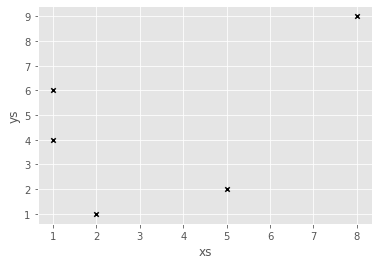

In [428]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter("xs", "ys", color = "black", marker = "x")

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

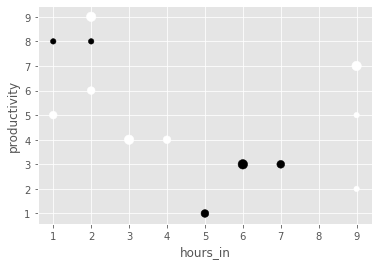

In [429]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

(-1, 12)

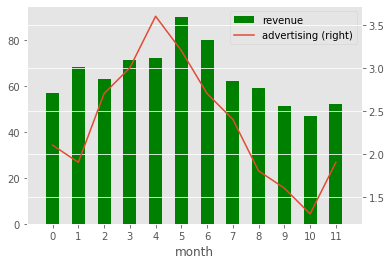

In [430]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [431]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [432]:
df = day_stock_data()
df.head()

,time,price
0,2020-06-09 09:30:00,100.000000
1,2020-06-09 09:30:05,100.011227
2,2020-06-09 09:30:07,100.073311
3,2020-06-09 09:30:10,100.111741
4,2020-06-09 09:30:10,100.200351


In [433]:
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2020-06-09 09:00:00,100.000000,102.932634,100.000000,102.698486,green
2020-06-09 10:00:00,102.668567,103.318690,100.871213,102.686743,green
2020-06-09 11:00:00,102.599286,102.693276,99.516654,99.720766,red
2020-06-09 12:00:00,99.819249,101.890640,99.619856,101.215535,green
2020-06-09 13:00:00,101.224131,101.402216,98.392751,99.454223,red


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

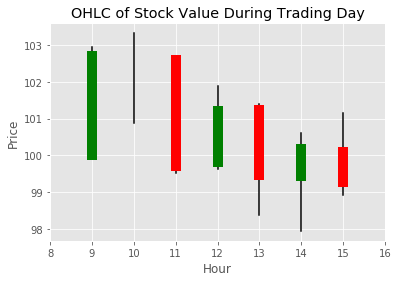

In [434]:
plot_candlestick(agg)

*More exercises to follow soon...*